<a href="https://colab.research.google.com/github/Derrick-Majani/Product-Segmentation/blob/main/UnsupervisedKmeansipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective

To perform an exploratory data analysis and cluster the products based on various factors


## Key Questions

- Which variables are most important for clustering?
- How each cluster is different from the others?
- What are the business recommendations?


## Data Description

The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

- Product Name: Name of the product
- Product ID: ID of the product
- Listing Price: Listed price of the product
- Sale Price: Sale price of the product
- Discount: Percentage of discount on the product
- Brand: Brand of the product
- Rating: Rating of the product
- Reviews: Number of reviews for the product

## Import Data

In [46]:
# this will help in making the Python code more structured automatically (good coding practice)


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler
import io
# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
# Use Local drives to upload the excel on google colab
from google.colab import files
uploaded = files.upload()

Saving data_add_nik.csv to data_add_nik.csv


In [48]:
data=pd.read_csv(io.BytesIO(uploaded['data_add_nik.csv']))
data.head(10)


,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,1.0,45
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,4.4,2
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,2.8,7
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,Adidas CORE / NEO,4.5,16
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,4.0,39


In [49]:
data.shape

(3268, 8)

In [50]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [51]:
df.columns

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Rating', 'Reviews'],
      dtype='object')

In [52]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

In [53]:
df.columns

Index(['Product_Name', 'Product_ID', 'Listing_Price', 'Sale_Price', 'Discount',
       'Brand', 'Rating', 'Reviews'],
      dtype='object')

In [54]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_Name   3268 non-null   object 
 1   Product_ID     3268 non-null   object 
 2   Listing_Price  3268 non-null   int64  
 3   Sale_Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


In [55]:
df.drop("Product_ID", axis=1, inplace=True)

In [56]:
# let's check for duplicate observations
df.duplicated().sum()

117

In [57]:
df1 = df[df.duplicated()]
df1


,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
1871,Men's adidas Originals Yung-96 Shoes,7999,4799,40,Adidas ORIGINALS,1.0,10
2654,Nike React Phantom Run Flyknit 2,0,11995,0,Nike,0.0,0
2677,Nike Air Max 90,0,9995,0,Nike,0.0,0
2691,Nike SuperRep Go,0,7995,0,Nike,0.0,0
2695,Nike Air Max 90,0,9995,0,Nike,5.0,9
2707,Nike Free Metcon 3,0,9995,0,Nike,5.0,1
2762,Nike Free RN 5.0 2020,0,7995,0,Nike,0.0,0
2767,Nike Air Max 2090,0,11995,0,Nike,0.0,0
2792,Nike Metcon 5 AMP,0,11995,0,Nike,5.0,2
2803,Nike Air Max 720,0,15995,0,Nike,0.0,0


In [58]:
mask = (df.duplicated()) & (df['Listing_Price'] == 0)
df.loc[mask, 'Listing_Price'] = df.loc[mask, 'Sale_Price']

# Print the results
df[mask]


,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2654,Nike React Phantom Run Flyknit 2,11995,11995,0,Nike,0.0,0
2677,Nike Air Max 90,9995,9995,0,Nike,0.0,0
2691,Nike SuperRep Go,7995,7995,0,Nike,0.0,0
2695,Nike Air Max 90,9995,9995,0,Nike,5.0,9
2707,Nike Free Metcon 3,9995,9995,0,Nike,5.0,1
2762,Nike Free RN 5.0 2020,7995,7995,0,Nike,0.0,0
2767,Nike Air Max 2090,11995,11995,0,Nike,0.0,0
2792,Nike Metcon 5 AMP,11995,11995,0,Nike,5.0,2
2803,Nike Air Max 720,15995,15995,0,Nike,0.0,0
2834,Nike Air Max 270 React ENG,14995,14995,0,Nike,0.0,0


In [59]:
df_duplicates = df[df.duplicated()]
mask = (df_duplicates['Listing_Price'] > df_duplicates['Sale_Price']) & (df_duplicates['Discount'] == 0)
df_duplicates.loc[mask, 'Discount'] = ((df_duplicates.loc[mask, 'Listing_Price'] - df_duplicates.loc[mask, 'Sale_Price']) / df_duplicates.loc[mask, 'Listing_Price']) * 100

# Get the affected rows
affected_rows = df_duplicates[mask]

# Update the original DataFrame with the modified values
df.update(df_duplicates)

# Print the affected rows
print("Affected Rows:")
affected_rows


Affected Rows:


,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2924,Nike Air Max 270 React,14995,8997,40.000000,Nike,0.0,0
3020,Nike Mercurial Vapor 13 Club TF,4995,3497,29.989990,Nike,0.0,0
3032,Jordan Proto-Max 720,15995,12797,19.993748,Nike,4.4,18
3056,Nike Mercurial Vapor XII Club MG,4995,3997,19.979980,Nike,0.0,0
3068,Nike Phantom Vision Academy Dynamic Fit MG,8495,5947,29.994114,Nike,4.0,5
3080,Nike Phantom Vision Club Dynamic Fit FG,5995,4497,24.987490,Nike,5.0,1
3083,Nike TiempoX Lunar Legend VII Pro TF,8995,7197,19.988883,Nike,3.0,1
3120,Jordan Proto-React Z,13995,11197,19.992855,Nike,4.6,5
3143,Nike Mercurial Vapor 13 Academy MDS TF,7495,5247,29.993329,Nike,0.0,0
3144,PG 3 NASA,9995,7997,19.989995,Nike,3.7,11


In [60]:
df

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,14999.0,7499.0,50.000000,Adidas Adidas ORIGINALS,4.8,41.0
1,Women's adidas Originals Sleek Shoes,7599.0,3799.0,50.000000,Adidas ORIGINALS,3.3,24.0
2,Women's adidas Swim Puka Slippers,999.0,599.0,40.000000,Adidas CORE / NEO,2.6,37.0
3,Women's adidas Sport Inspired Questar Ride Shoes,6999.0,3499.0,50.000000,Adidas CORE / NEO,4.1,35.0
4,Women's adidas Originals Taekwondo Shoes,7999.0,3999.0,50.000000,Adidas ORIGINALS,3.5,72.0
...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,15995.0,12797.0,0.000000,Nike,5.0,1.0
3264,Nike Phantom Venom Club IC,4995.0,3497.0,29.989990,Nike,0.0,0.0
3265,Nike Mercurial Superfly 7 Academy TF,8495.0,5947.0,29.994114,Nike,5.0,1.0
3266,Nike Air Max 98,0.0,16995.0,0.000000,Nike,4.0,4.0


In [61]:
df[df['Listing_Price'] == 0]

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,0.0,7495.0,0.0,Nike,0.0,0.0
2626,Nike Air Force 1 '07,0.0,7495.0,0.0,Nike,0.0,0.0
2627,Nike Air Force 1 Sage Low LX,0.0,9995.0,0.0,Nike,0.0,0.0
2628,Nike Air Max Dia SE,0.0,9995.0,0.0,Nike,0.0,0.0
2629,Nike Air Max Verona,0.0,9995.0,0.0,Nike,0.0,0.0
...,...,...,...,...,...,...,...
3254,Nike Mercurial Vapor 13 Club MG,0.0,4995.0,0.0,Nike,0.0,0.0
3257,Air Jordan 5 Retro,0.0,15995.0,0.0,Nike,3.3,3.0
3260,Nike Tiempo Legend 8 Academy TF,0.0,6495.0,0.0,Nike,0.0,0.0
3262,Nike React Metcon AMP,0.0,13995.0,0.0,Nike,3.0,1.0


## Statistical Analysis

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Listing_Price,3268.0,7178.776010,4721.536270,0.0,4599.0,6599.0,8999.0,29999.0
Sale_Price,3268.0,6134.265606,4293.247581,449.0,2999.0,4799.0,7995.0,36500.0
Discount,3268.0,27.085306,22.510510,0.0,0.0,40.0,50.0,60.0
Rating,3268.0,3.242105,1.428856,0.0,2.6,3.5,4.4,5.0
Reviews,3268.0,40.551714,31.543491,0.0,10.0,37.0,68.0,223.0


In [63]:
# Print categorical summary
print('Categorical Summary:')
df.describe(include=['object']).T

Categorical Summary:


,count,unique,top,freq
Product_Name,3268,1531,Women's adidas Originals Sambarose Shoes,16
Brand,3268,5,Adidas CORE / NEO,1111


In [64]:
df.loc[df['Listing_Price'] == 0, 'Listing_Price'] = df.loc[df['Listing_Price'] == 0, 'Sale_Price']


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Listing_Price,3268.0,8330.619645,4418.534069,899.0,4999.0,7599.0,10995.0,36500.0
Sale_Price,3268.0,6134.265606,4293.247581,449.0,2999.0,4799.0,7995.0,36500.0
Discount,3268.0,27.085306,22.510510,0.0,0.0,40.0,50.0,60.0
Rating,3268.0,3.242105,1.428856,0.0,2.6,3.5,4.4,5.0
Reviews,3268.0,40.551714,31.543491,0.0,10.0,37.0,68.0,223.0


In [66]:
df.sample(n=10)

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
781,Women's adidas Originals NMD_R1 Shoes,12999.0,7799.0,40.0,Adidas ORIGINALS,4.8,83.0
2553,Men's adidas Sport Inspired VL Court 2.0 Shoes,4999.0,2999.0,40.0,Adidas CORE / NEO,4.5,7.0
382,Men's adidas Running Duramo 9 Shoes,5999.0,2999.0,50.0,Adidas CORE / NEO,4.6,93.0
127,Women's adidas Sport Inspired Court 80s Shoes,6999.0,4199.0,40.0,Adidas CORE / NEO,2.4,48.0
504,Women's adidas Originals Sleek Shoes,7599.0,7599.0,0.0,Adidas ORIGINALS,3.5,38.0
314,Men's adidas Running Helkin 3 Shoes,4599.0,2299.0,50.0,Adidas CORE / NEO,4.7,8.0
1540,MEN'S ADIDAS ORIGINALS MATCHCOURT HIGH RX SHOES,6999.0,3499.0,50.0,Adidas ORIGINALS,2.9,91.0
2597,Unisex Bascketball Dame 6 GCA - Forbidden City...,12999.0,12999.0,0.0,Adidas SPORT PERFORMANCE,3.7,22.0
1504,Men's adidas Originals Skateboarding 3MC Shoes,5999.0,3599.0,40.0,Adidas ORIGINALS,4.0,80.0
1021,Men's adidas Sport Inspired Arcadeis Shoes,4599.0,2299.0,50.0,Adidas CORE / NEO,4.6,51.0


## Univariate Analysis

In [67]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

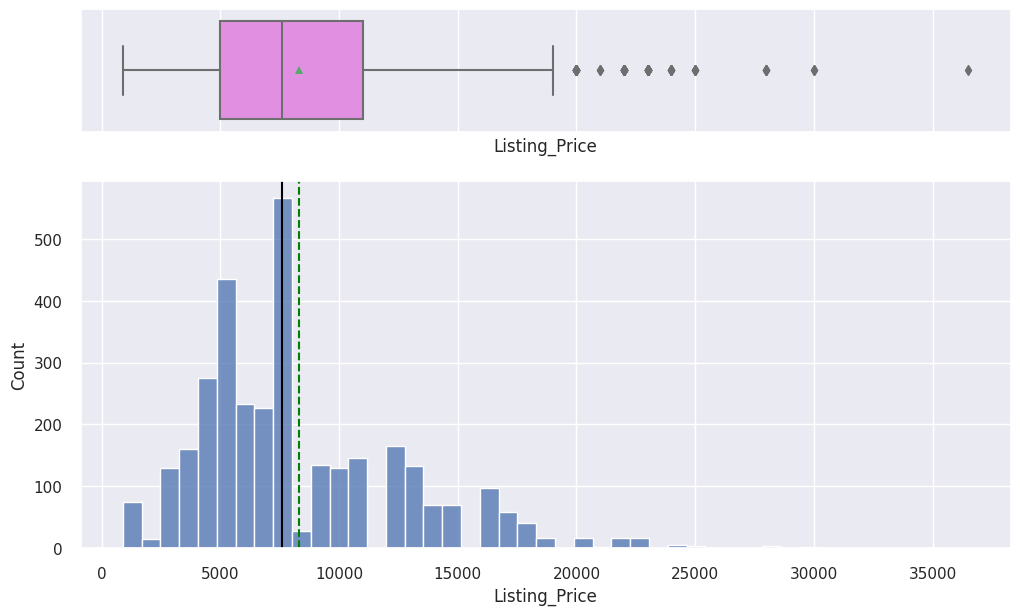

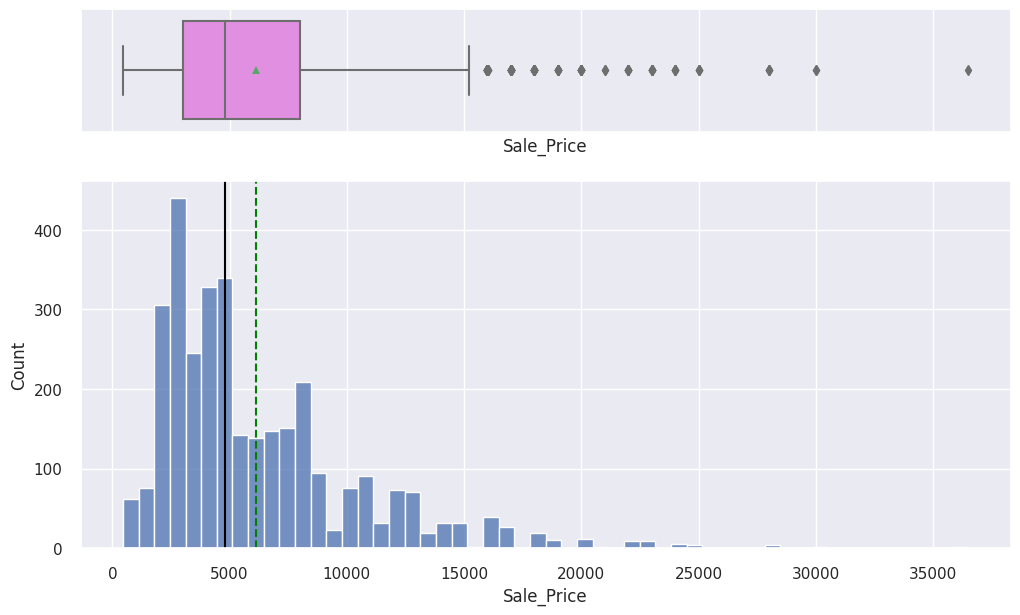

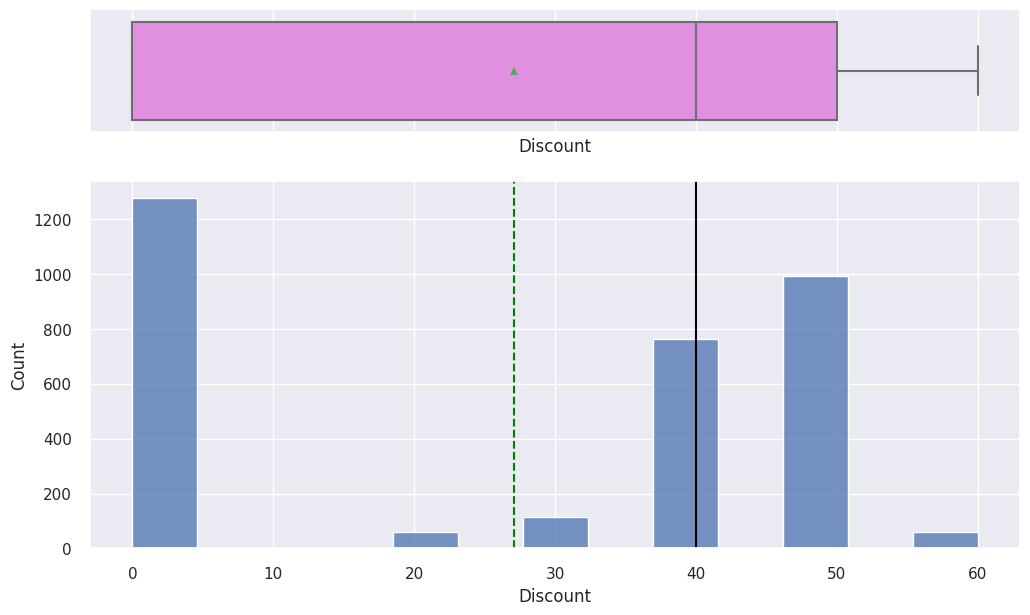

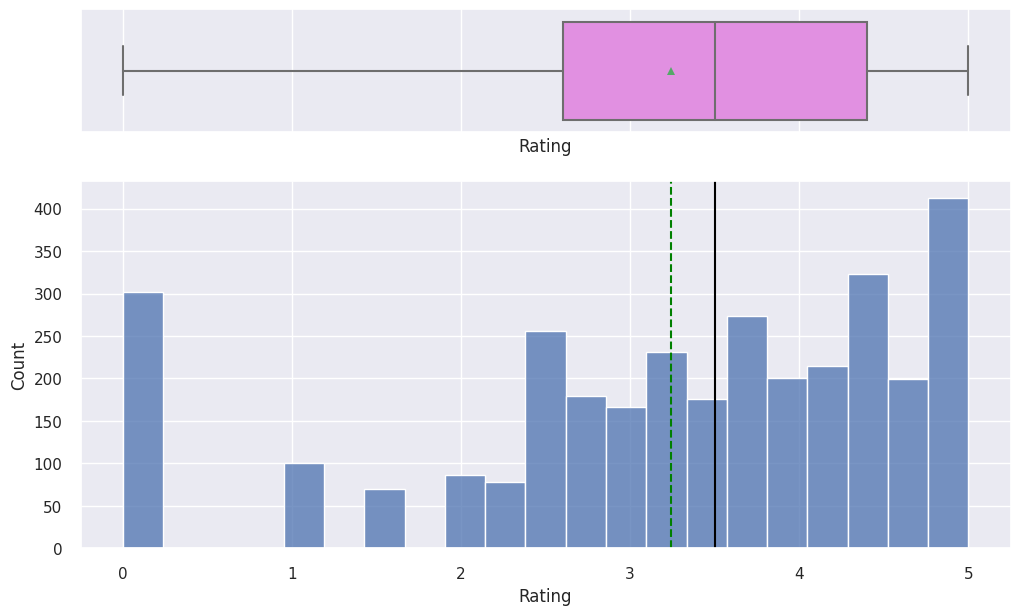

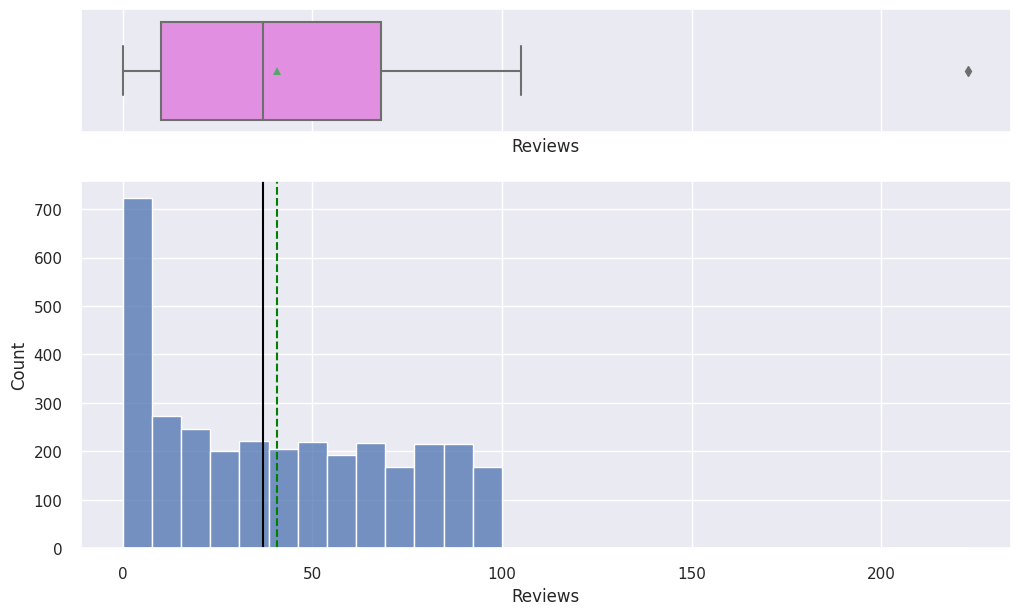

In [68]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

In [69]:
df[df["Listing_Price"] > 35000]

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
3148,Nike Air VaporMax Flyknit 2 LXX,36500.0,36500.0,0.0,Nike,0.0,0.0


In [70]:
df[df["Reviews"] > 200]

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2750,Air Jordan 10 Retro,15995.0,15995.0,0.0,Nike,4.7,223.0


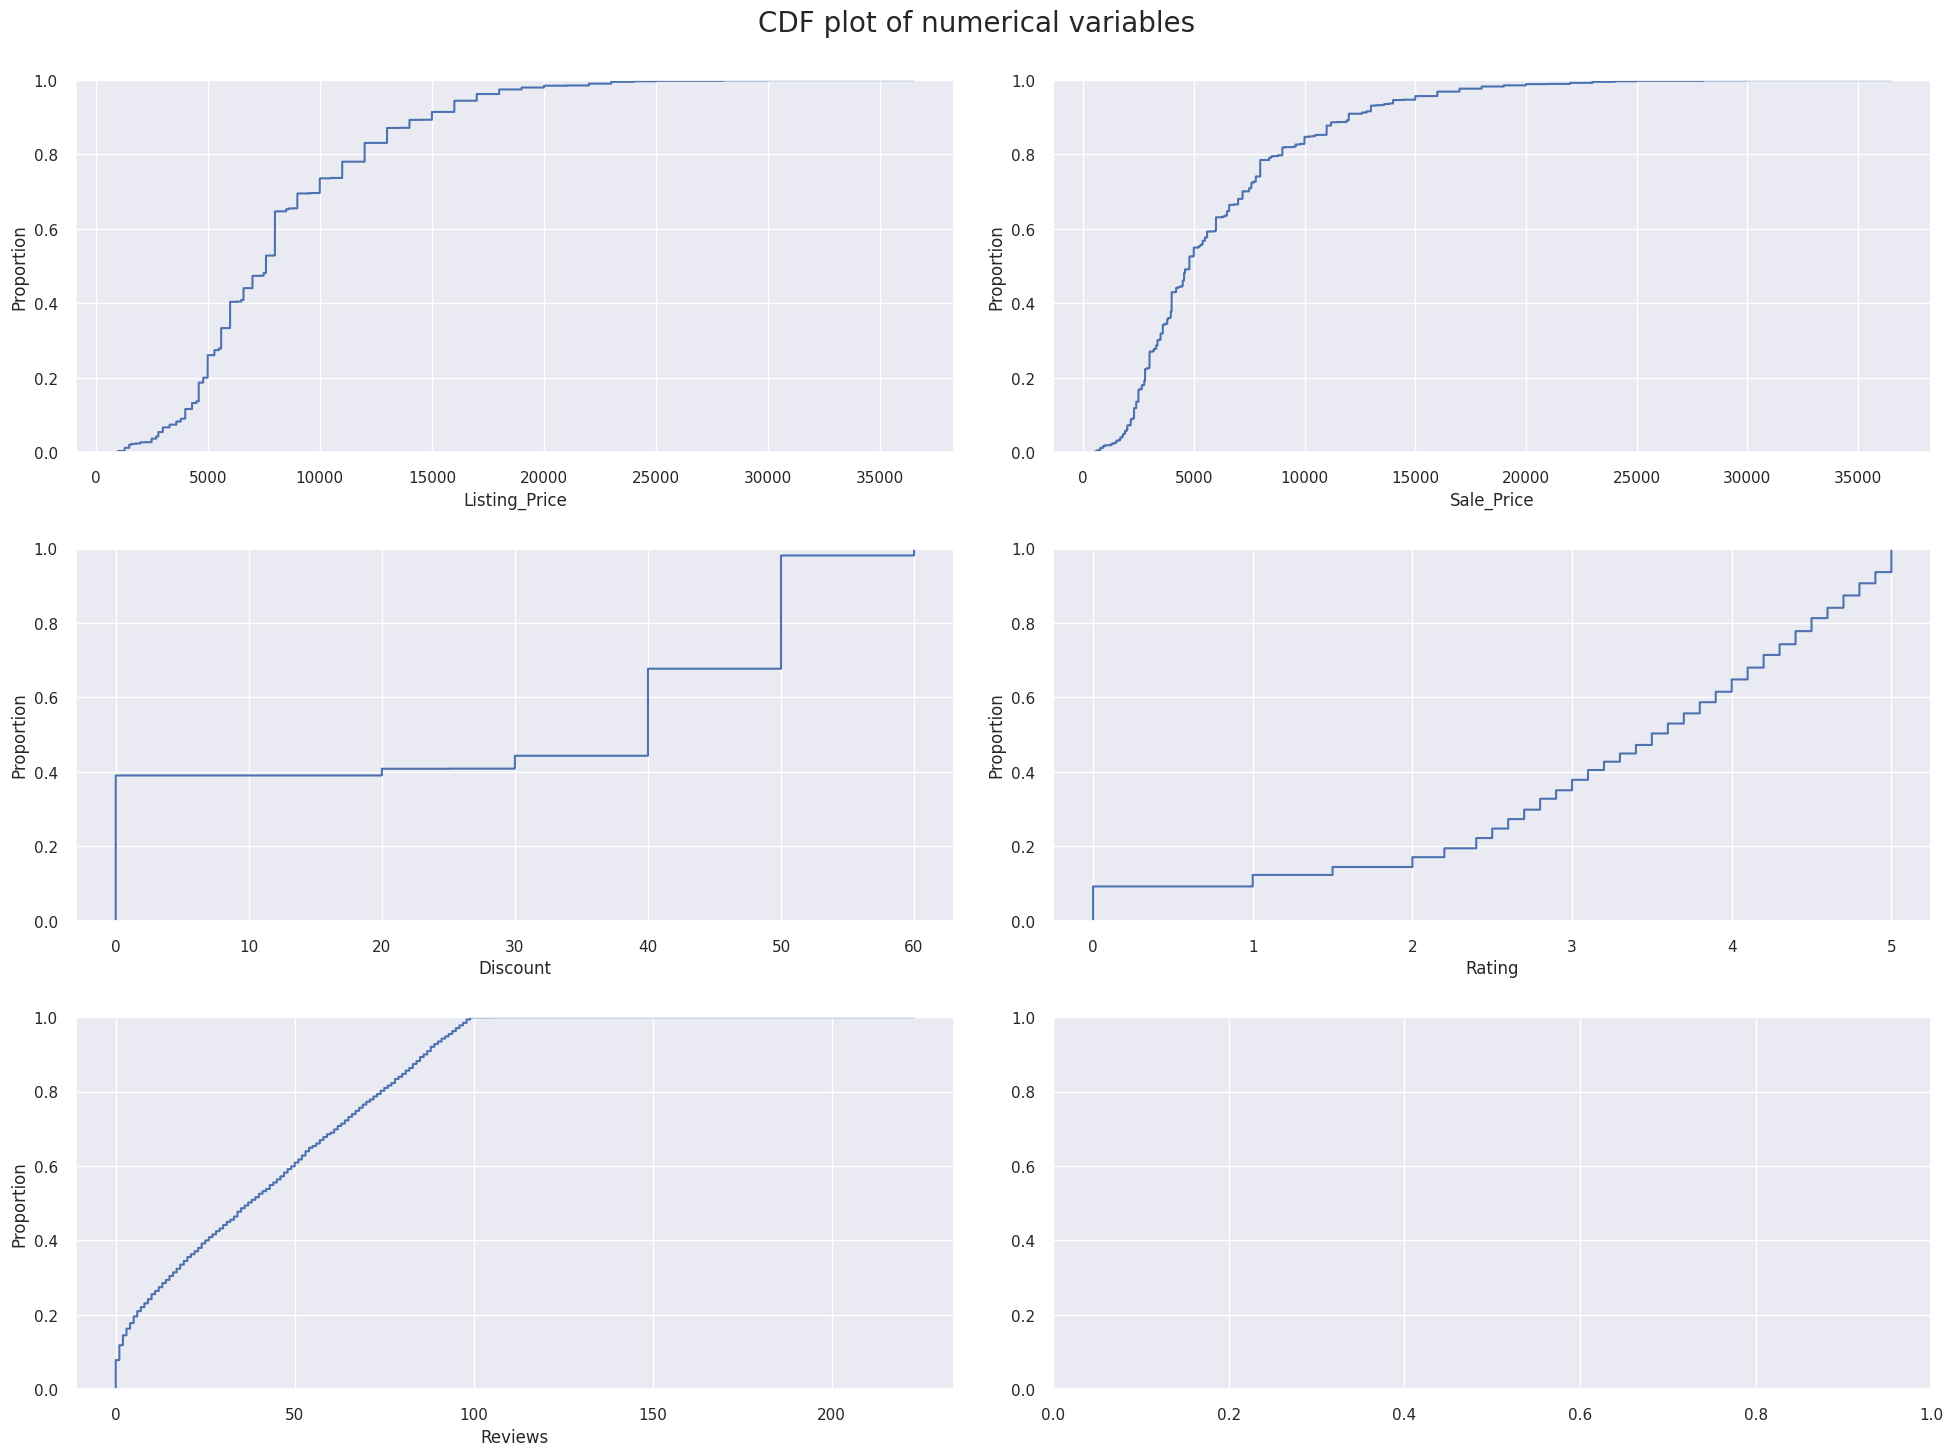

In [71]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

In [72]:
df = df.round(1)


In [73]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

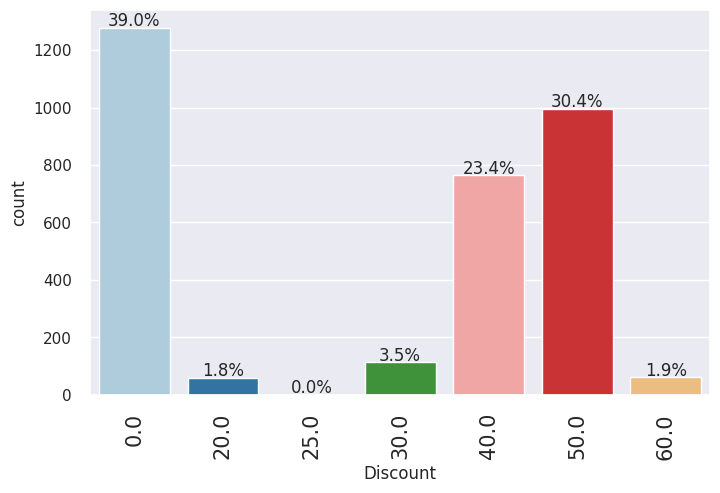

In [74]:
# let's explore discounts further
labeled_barplot(df, "Discount", perc=True)

In [75]:
df[df["Discount"] == 25]

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
3080,Nike Phantom Vision Club Dynamic Fit FG,5995.0,4497.0,25.0,Nike,5.0,1.0


## Bivariate Analysis

<ipython-input-76-6794373c1717>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = df.corr().round(4)


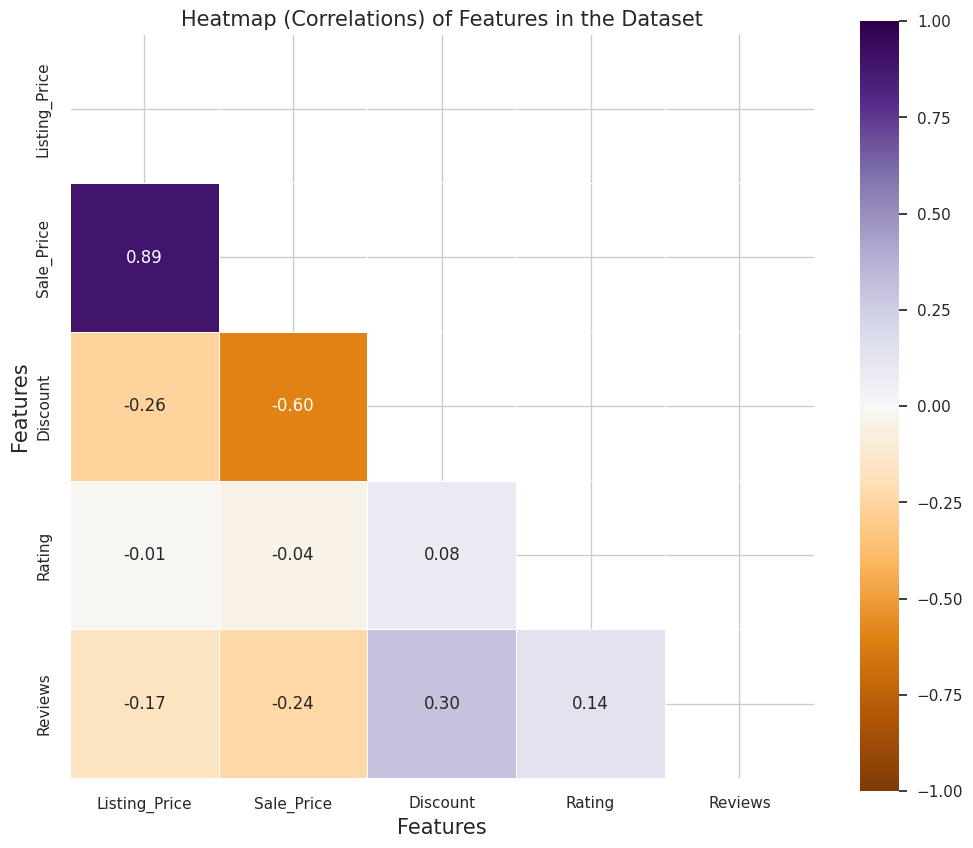

In [76]:
# Create a correlation for the dataset.
dataset_corr = df.corr().round(4)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Create a correlation matrix. Only bottom left corner valued.
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn.
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.2f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()


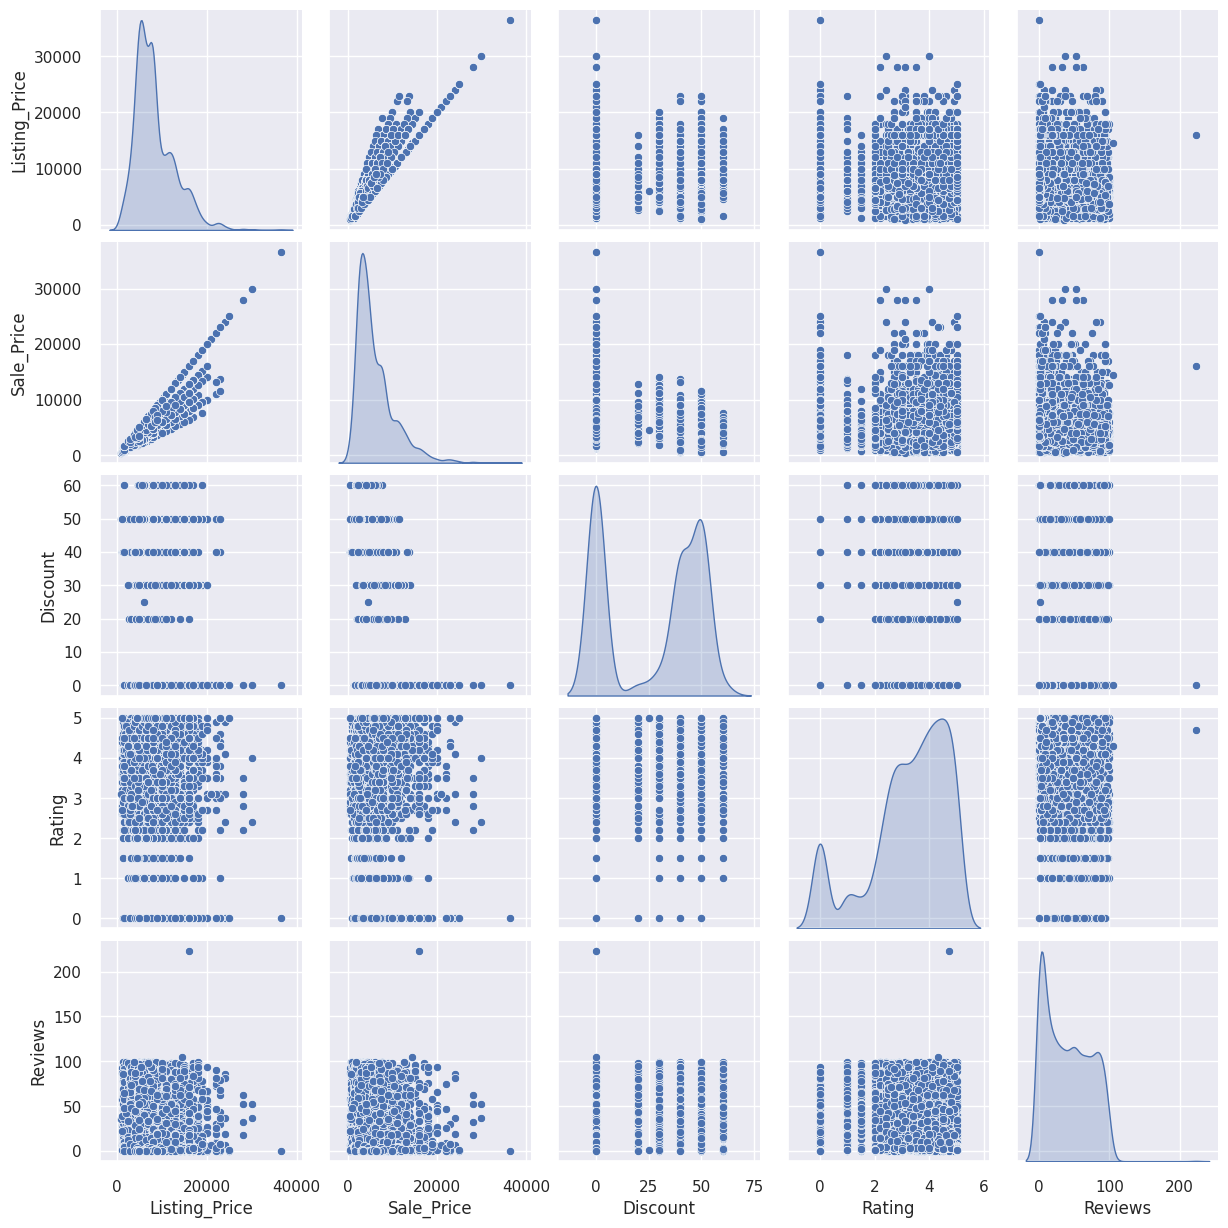

In [77]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

## Chi- Square

In [78]:
from scipy.stats import chi2_contingency
# Select the categorical columns to test
cat_cols = ['Product_Name', 'Brand']

# Create an empty dataframe for results
results_df = pd.DataFrame(columns=['Column 1', 'Column 2', 'Chi-Square', 'P-Value'])

# Loop through each column pair and perform chi-square test
for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols[i+1:]):
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)

# Print the results
results_df

<ipython-input-78-a65bc12747b5>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)


,Column 1,Column 2,Chi-Square,P-Value
0,Product_Name,Brand,13072.0,0.0


## Data Preprocessing

In [79]:
# copying the data to another variable to avoid any changes to original data
df1 = df.copy()

In [80]:
df1.head()

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,14999.0,7499.0,50.0,Adidas Adidas ORIGINALS,4.8,41.0
1,Women's adidas Originals Sleek Shoes,7599.0,3799.0,50.0,Adidas ORIGINALS,3.3,24.0
2,Women's adidas Swim Puka Slippers,999.0,599.0,40.0,Adidas CORE / NEO,2.6,37.0
3,Women's adidas Sport Inspired Questar Ride Shoes,6999.0,3499.0,50.0,Adidas CORE / NEO,4.1,35.0
4,Women's adidas Originals Taekwondo Shoes,7999.0,3999.0,50.0,Adidas ORIGINALS,3.5,72.0


In [81]:
df.head()

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,14999.0,7499.0,50.0,Adidas Adidas ORIGINALS,4.8,41.0
1,Women's adidas Originals Sleek Shoes,7599.0,3799.0,50.0,Adidas ORIGINALS,3.3,24.0
2,Women's adidas Swim Puka Slippers,999.0,599.0,40.0,Adidas CORE / NEO,2.6,37.0
3,Women's adidas Sport Inspired Questar Ride Shoes,6999.0,3499.0,50.0,Adidas CORE / NEO,4.1,35.0
4,Women's adidas Originals Taekwondo Shoes,7999.0,3999.0,50.0,Adidas ORIGINALS,3.5,72.0


In [82]:
from sklearn.preprocessing import StandardScaler

# Select the numerical variables to scale
numerical_vars = ['Listing_Price', 'Sale_Price', 'Discount','Rating','Reviews']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical variables
df1[numerical_vars] = scaler.fit_transform(df1[numerical_vars])


In [83]:
df1.head()

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,1.509415,0.317928,1.018108,Adidas Adidas ORIGINALS,1.090476,0.014214
1,Women's adidas Originals Sleek Shoes,-0.165605,-0.544022,1.018108,Adidas ORIGINALS,0.040524,-0.524807
2,Women's adidas Swim Puka Slippers,-1.659542,-1.289493,0.573803,Adidas CORE / NEO,-0.449453,-0.112615
3,Women's adidas Sport Inspired Questar Ride Shoes,-0.301417,-0.613910,1.018108,Adidas CORE / NEO,0.600498,-0.176029
4,Women's adidas Originals Taekwondo Shoes,-0.075063,-0.497431,1.018108,Adidas ORIGINALS,0.180518,0.997134


### Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

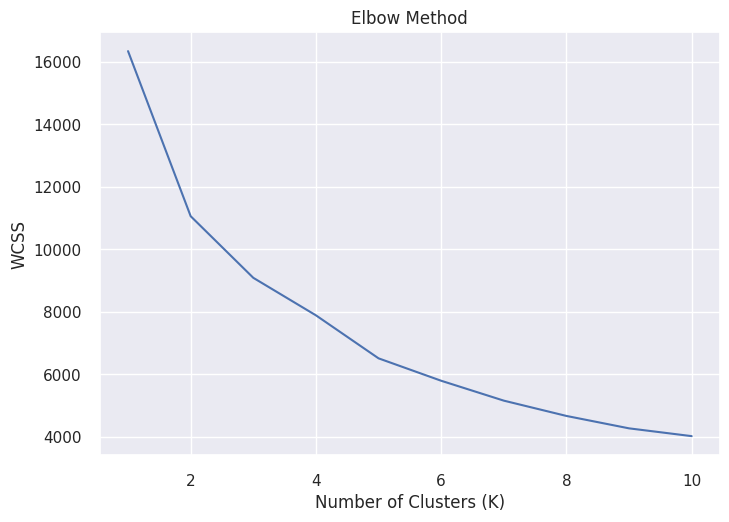

In [84]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the numerical features for clustering
numerical_features = ['Listing_Price', 'Sale_Price', 'Discount','Rating','Reviews']

# Create an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Perform K-means clustering for different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1[numerical_features])
    wcss.append(kmeans.inertia_)  # Get the WCSS

# Plot the WCSS against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


- appropriate value of K seems to be around 2 and 3

### silhouette_score

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Select numerical features for clustering
numerical_features = ['Listing_Price', 'Sale_Price', 'Discount', 'Rating', 'Reviews']
X = df1[numerical_features]

# Define range of K values
k_values = range(2, 11)

# Perform clustering and calculate silhouette coefficient for each K value
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Find the index of the maximum silhouette score
best_k_index = np.argmax(silhouette_scores)
best_k = k_values[best_k_index]

# Print the silhouette scores and the best K
for k, score in zip(k_values, silhouette_scores):
    print(f"Silhouette score for K={k}: {score:.3f}")

print(f"Best K: {best_k}")




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette score for K=2: 0.335
Silhouette score for K=3: 0.299
Silhouette score for K=4: 0.313
Silhouette score for K=5: 0.276
Silhouette score for K=6: 0.286
Silhouette score for K=7: 0.297
Silhouette score for K=8: 0.297
Silhouette score for K=9: 0.294
Silhouette score for K=10: 0.290
Best K: 2


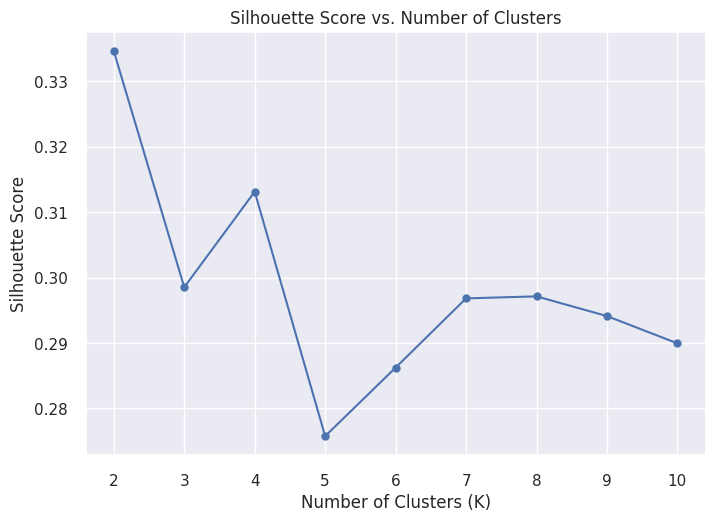

In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()



## Summary Clusters

In [87]:
from sklearn.cluster import KMeans

# Select numerical features for clustering
numerical_features = ['Listing_Price', 'Sale_Price', 'Discount', 'Rating', 'Reviews']
X = df[numerical_features]

# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

# Assign cluster labels to the DataFrame
df['Cluster'] = labels

# Get mean and count of variables under different clusters
cluster_profile = df.groupby('Cluster').agg(['mean', 'count'])

# Print the cluster profiles
cluster_profile


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-87-a914978fb74e>:15: FutureWarning: ['Product_Name', 'Brand'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_profile = df.groupby('Cluster').agg(['mean', 'count'])


Listing_Price          Sale_Price         Discount          Rating  \
                 mean count          mean count       mean count      mean   
Cluster                                                                      
0         5551.179226  1964   3507.072811  1964  34.946538  1964  3.255295   
1        17094.914365   362  15279.723757   362   6.574586   362  3.234530   
2        10757.526539   942   8097.270701   942  18.577495   942  3.217516   

                 Reviews        
        count       mean count  
Cluster                         
0        1964  45.649185  1964  
1         362  26.994475   362  
2         942  35.133758   942

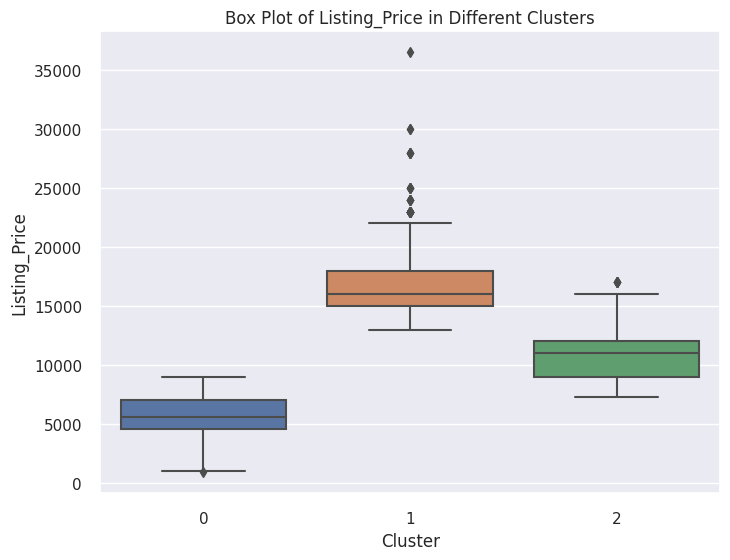

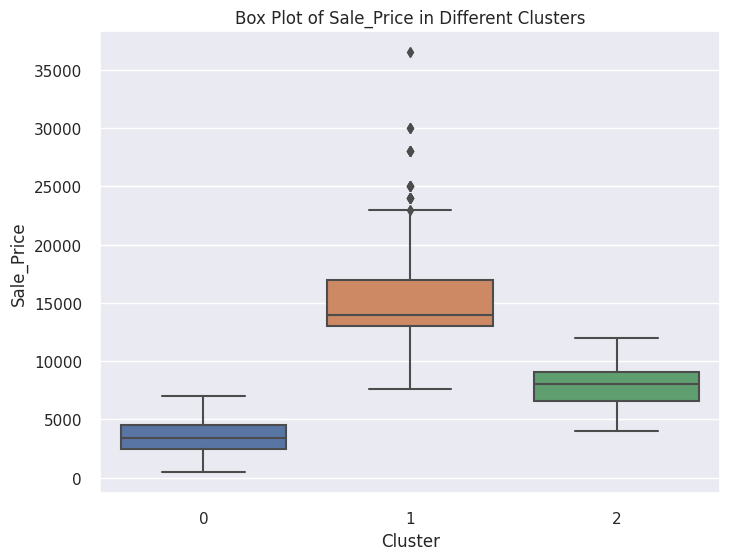

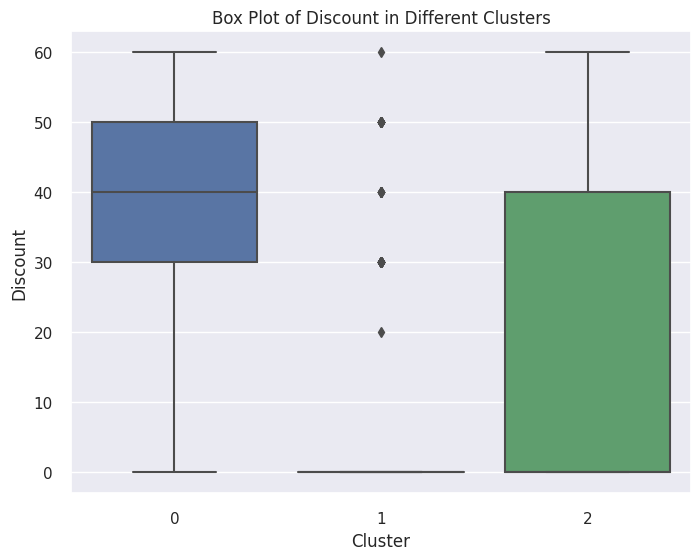

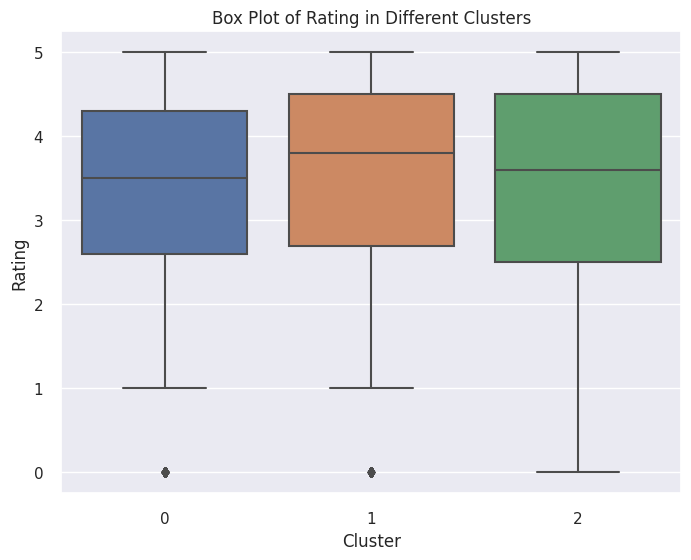

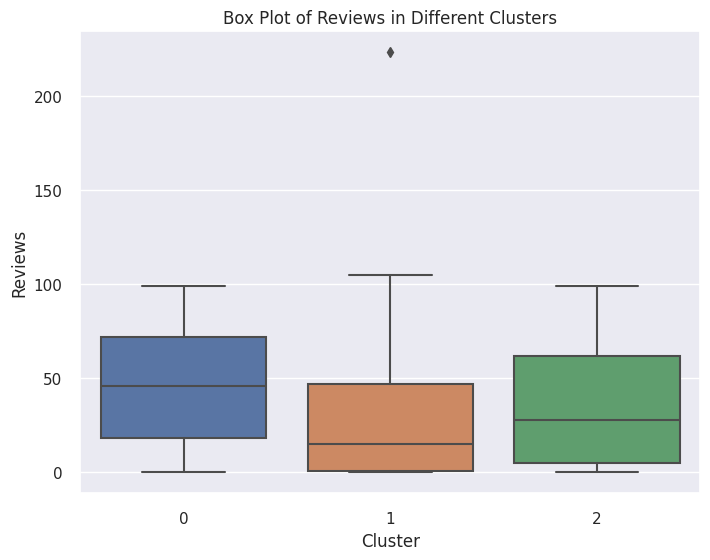

In [88]:
# Plot box plots for each numerical feature in different clusters
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Cluster', y=feature)
    plt.title(f"Box Plot of {feature} in Different Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()


In [89]:
from sklearn.cluster import KMeans

# Select numerical features for clustering
numerical_features = ['Listing_Price', 'Sale_Price', 'Discount', 'Rating', 'Reviews']
X = df[numerical_features]

# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

# Assign cluster labels to the DataFrame
df['Cluster'] = labels

# Create separate DataFrames for cluster 0 and cluster 1
cluster_0_data = df[df['Cluster'] == 0]
cluster_1_data = df[df['Cluster'] == 1]
cluster_2_data = df[df['Cluster'] == 2]

# Concatenate the DataFrames
cluster_data = pd.concat([cluster_0_data, cluster_1_data,cluster_2_data])

cluster_data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews,Cluster
1,Women's adidas Originals Sleek Shoes,7599.0,3799.0,50.0,Adidas ORIGINALS,3.3,24.0,0
2,Women's adidas Swim Puka Slippers,999.0,599.0,40.0,Adidas CORE / NEO,2.6,37.0,0
3,Women's adidas Sport Inspired Questar Ride Shoes,6999.0,3499.0,50.0,Adidas CORE / NEO,4.1,35.0,0
4,Women's adidas Originals Taekwondo Shoes,7999.0,3999.0,50.0,Adidas ORIGINALS,3.5,72.0,0
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,4799.0,1920.0,60.0,Adidas CORE / NEO,1.0,45.0,0
...,...,...,...,...,...,...,...,...
3253,Air Jordan 1 Jester XX Low Laced SE,8995.0,7197.0,0.0,Nike,0.0,0.0,2
3256,Nike Metcon 5 AMP,11995.0,11995.0,0.0,Nike,4.5,2.0,2
3261,Kyrie 6 'Enlightenment',10995.0,8797.0,20.0,Nike,4.4,10.0,2
3265,Nike Mercurial Superfly 7 Academy TF,8495.0,5947.0,30.0,Nike,5.0,1.0,2


### Statistical Analysis -Cluster

In [90]:
cluster_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Listing_Price,3268.0,8330.619645,4418.534069,899.0,4999.0,7599.0,10995.0,36500.0
Sale_Price,3268.0,6134.265606,4293.247581,449.0,2999.0,4799.0,7995.0,36500.0
Discount,3268.0,27.085373,22.510503,0.0,0.0,40.0,50.0,60.0
Rating,3268.0,3.242105,1.428856,0.0,2.6,3.5,4.4,5.0
Reviews,3268.0,40.551714,31.543491,0.0,10.0,37.0,68.0,223.0
Cluster,3268.0,0.725826,0.897628,0.0,0.0,0.0,2.0,2.0


In [91]:
# Print categorical summary
print('Categorical Summary:')
cluster_data.describe(include=['object']).T

Categorical Summary:


,count,unique,top,freq
Product_Name,3268,1531,Women's adidas Originals Sambarose Shoes,16
Brand,3268,5,Adidas CORE / NEO,1111


### Bivariate Analysis

<ipython-input-92-71f9bc54786f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = cluster_data.corr().round(4)


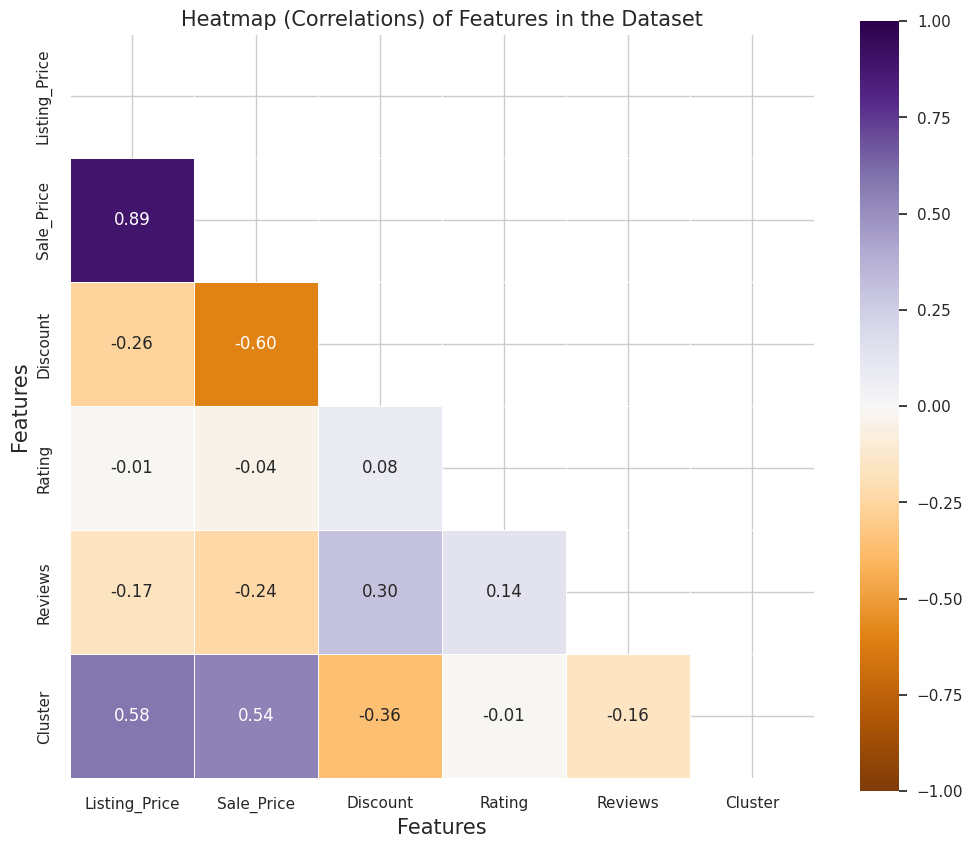

In [92]:
# Create a correlation for the dataset.
dataset_corr = cluster_data.corr().round(4)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Create a correlation matrix. Only bottom left corner valued.
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn.
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.2f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()


In [94]:
# Create a cross-tabulation of clusters against Brand
cross_tab = pd.crosstab(cluster_data['Cluster'], cluster_data['Brand'])

# Print the cross-tabulation
cross_tab


Brand,Adidas Adidas ORIGINALS,Adidas CORE / NEO,Adidas ORIGINALS,Adidas SPORT PERFORMANCE,Nike
Cluster,,,,,
0,0,1087,376,314,110
1,0,0,76,103,211
2,1,24,455,189,322
